In [85]:
import os
import time
import math
import json
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [86]:
path = '/home/user/Videos/inference/ablation/new_ablation_train_data/data_pos.csv'
pos = pd.read_csv(path)#,index_col=0)

In [87]:
pos.shape

(838, 13)

In [88]:
path = '/home/user/Videos/inference/ablation/new_ablation_train_data/data_neg.csv'
neg = pd.read_csv(path)#,index_col=0)

In [89]:
result = pd.concat([pos,neg], axis=0)

In [90]:
result.shape

(1716, 13)

In [91]:
# path = '/home/user/Videos/data.csv'
# result = pd.read_csv(path,index_col=0)

In [92]:
result.head()

,0,1,2,3,4,5,6,7,8,9,10,11,label
0,0.739407,1.000000,1,1,1,0.0,1,1,1,1,0.00,0.000000,1
1,0.685600,0.800000,3,4,3,0.2,6,5,3,1,0.50,0.000000,1
2,0.685600,0.800000,3,4,3,0.2,6,5,3,1,0.50,0.000000,1
3,0.944251,1.000000,3,3,3,0.0,3,4,3,1,1.00,1.000000,1
4,0.404751,0.142857,1,1,1,0.0,1,1,1,1,0.25,0.333333,1


In [93]:
y = result['label']
X = result.drop(['label'],axis=1)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [95]:
# Initialize the logistic regression model
model = LogisticRegression()

In [96]:
# Train the model
model.fit(X_train, y_train)

/home/user/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

In [98]:
# Calculate AUROC
auroc = roc_auc_score(y_test, y_pred_proba)
print(f'AUROC: {auroc:.2f}')

AUROC: 0.95


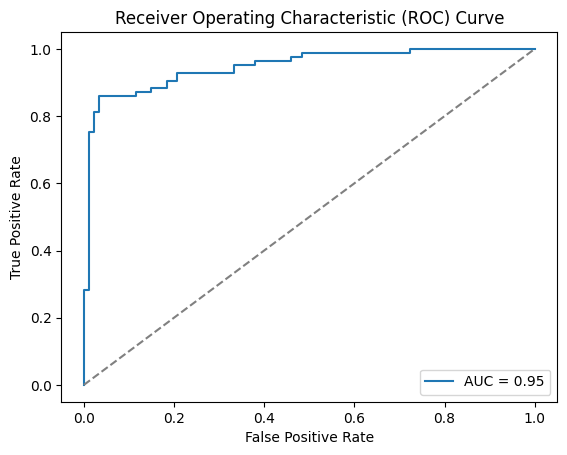

In [99]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auroc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [100]:
path1 = '/home/user/Videos/inference/ablation/samples_new/sample_o.csv'
path2 = '/home/user/Videos/inference/ablation/samples_new/sample_p.csv'
path3 = '/home/user/Videos/inference/ablation/samples_new/sample_s.csv'
path4 = '/home/user/Videos/inference/ablation/samples_new/sample_pos.csv'
sampled_o = pd.read_csv(path1)#,index_col=0)
sampled_p = pd.read_csv(path2)#,index_col=0)
sampled_s = pd.read_csv(path3)#,index_col=0)
pos = pd.read_csv(path4)

In [101]:
def preprocess_data(df):
    X = df.iloc[:, :-1].values  
    y = df.iloc[:, -1].values 
    return X,y

In [102]:
# Preprocess each dataset
X_o, y_o = preprocess_data(sampled_o)
X_s, y_s = preprocess_data(sampled_s)
X_p, y_p = preprocess_data(sampled_p)
X_pos, y_pos = preprocess_data(pos)

In [103]:
X_pos.shape

(40, 12)

In [104]:
def get_model_outputs(model, X):
    outputs = model.predict(X)
    return outputs

In [105]:
pr = get_model_outputs(model,X_pos)

/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [106]:
pr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [107]:
count_ones = np.sum(pr == 1)
print('positive data accuracy --->', (count_ones/40)*100)

positive data accuracy ---> 90.0


In [108]:
pr = get_model_outputs(model,X_o)

/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [109]:
count_ones = np.sum(pr == 1)
print('quantity perturb accuracy --->',100 - (count_ones/40)*100)

quantity perturb accuracy ---> 90.0


In [110]:
pr = get_model_outputs(model,X_s)

/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [111]:
count_ones = np.sum(pr == 1)
print('subject perturb accuracy --->',100 - (count_ones/40)*100)

subject perturb accuracy ---> 90.0


In [112]:
pr = get_model_outputs(model,X_p)

/home/user/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [113]:
count_ones = np.sum(pr == 1)
print('predicate perturb accuracy --->',100 - (count_ones/40)*100)

predicate perturb accuracy ---> 95.0
